##Bring in libraries and dataframes and set indexes

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Read in data
AllData=pd.read_csv('K:\Rainshelter\Wheat 2015-16\LoggedData\RainShelterBeta_Energy.dat', #specify file path for data to read in
                         #parse_dates=True, #tell the function to parse date columns to datetime formats
                         #dayfirst=True, #tell the function that the day is before the year in the data i.e format='%d/%m/%Y %H:%M'
                         skiprows = [0,2,3], #leave out rows 1, 3 and 4 which have redundant information
                         index_col = 0, #Use the first column, which is Date, as an index
                         na_values = 'NAN')
#Bring in index data
AllDataIndex=pd.read_csv('.\IndexFiles\RadiationAndTempIndex.csv',
                         index_col = 0)

#Apply indexes to data
AllDataTransposed = AllData.transpose()
AllDataIndexed = pd.concat([AllDataIndex,AllDataTransposed], axis=1)
AllDataIndexed.index.name='ColumnHeader'
AllDataIndexed.set_index(['Measurement','Nitrogen','Irrigation','Treatment','Units','Summary','Plot','Block'], 
                         append=False, inplace=True)
Data=AllDataIndexed.transpose()
Data.index = Data.index.to_datetime()  ## for some reason the concat function changes the data type on the date indes so need to change it back
Data.sort_index(inplace=True)
#correct for the heaf flux sensor in plot 117 which is upside down
Data.ix[:,[X for X in Data.columns if '117' in X and 'HeatFlux' in X]] *= -1
#Calculate treatment means
DataMeans = Data.groupby(level=['Measurement','Irrigation', 'Nitrogen'],axis=1).mean()
DataMeans =  DataMeans.dropna(axis=1) #For some reason it keeps non valid combinations in so need to extract with this function


C:\Anaconda\lib\site-packages\pandas\core\index.py:5091: PerformanceWarning: indexing past lexsort depth may impact performance.
  PerformanceWarning)


## Set time slice to graph

In [2]:
from datetime import timedelta #Import function needed for doing date deltas 
EndDate = Data.index.max(axis=0)  #Set end of series as most recent date in file
EndDateString = EndDate.strftime("%Y-%m-%d")  #Turn this to a string
PlotDuration = .1                              #Set the duration that you want to graph for
StartDate = EndDate - timedelta(weeks=PlotDuration)       #Set start date the specified duration before the end date 
StartDateString = StartDate.strftime("%Y-%m-%d")           #Turn that into a string

##Graph met data the check

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C78D048>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011261E80>], dtype=object)

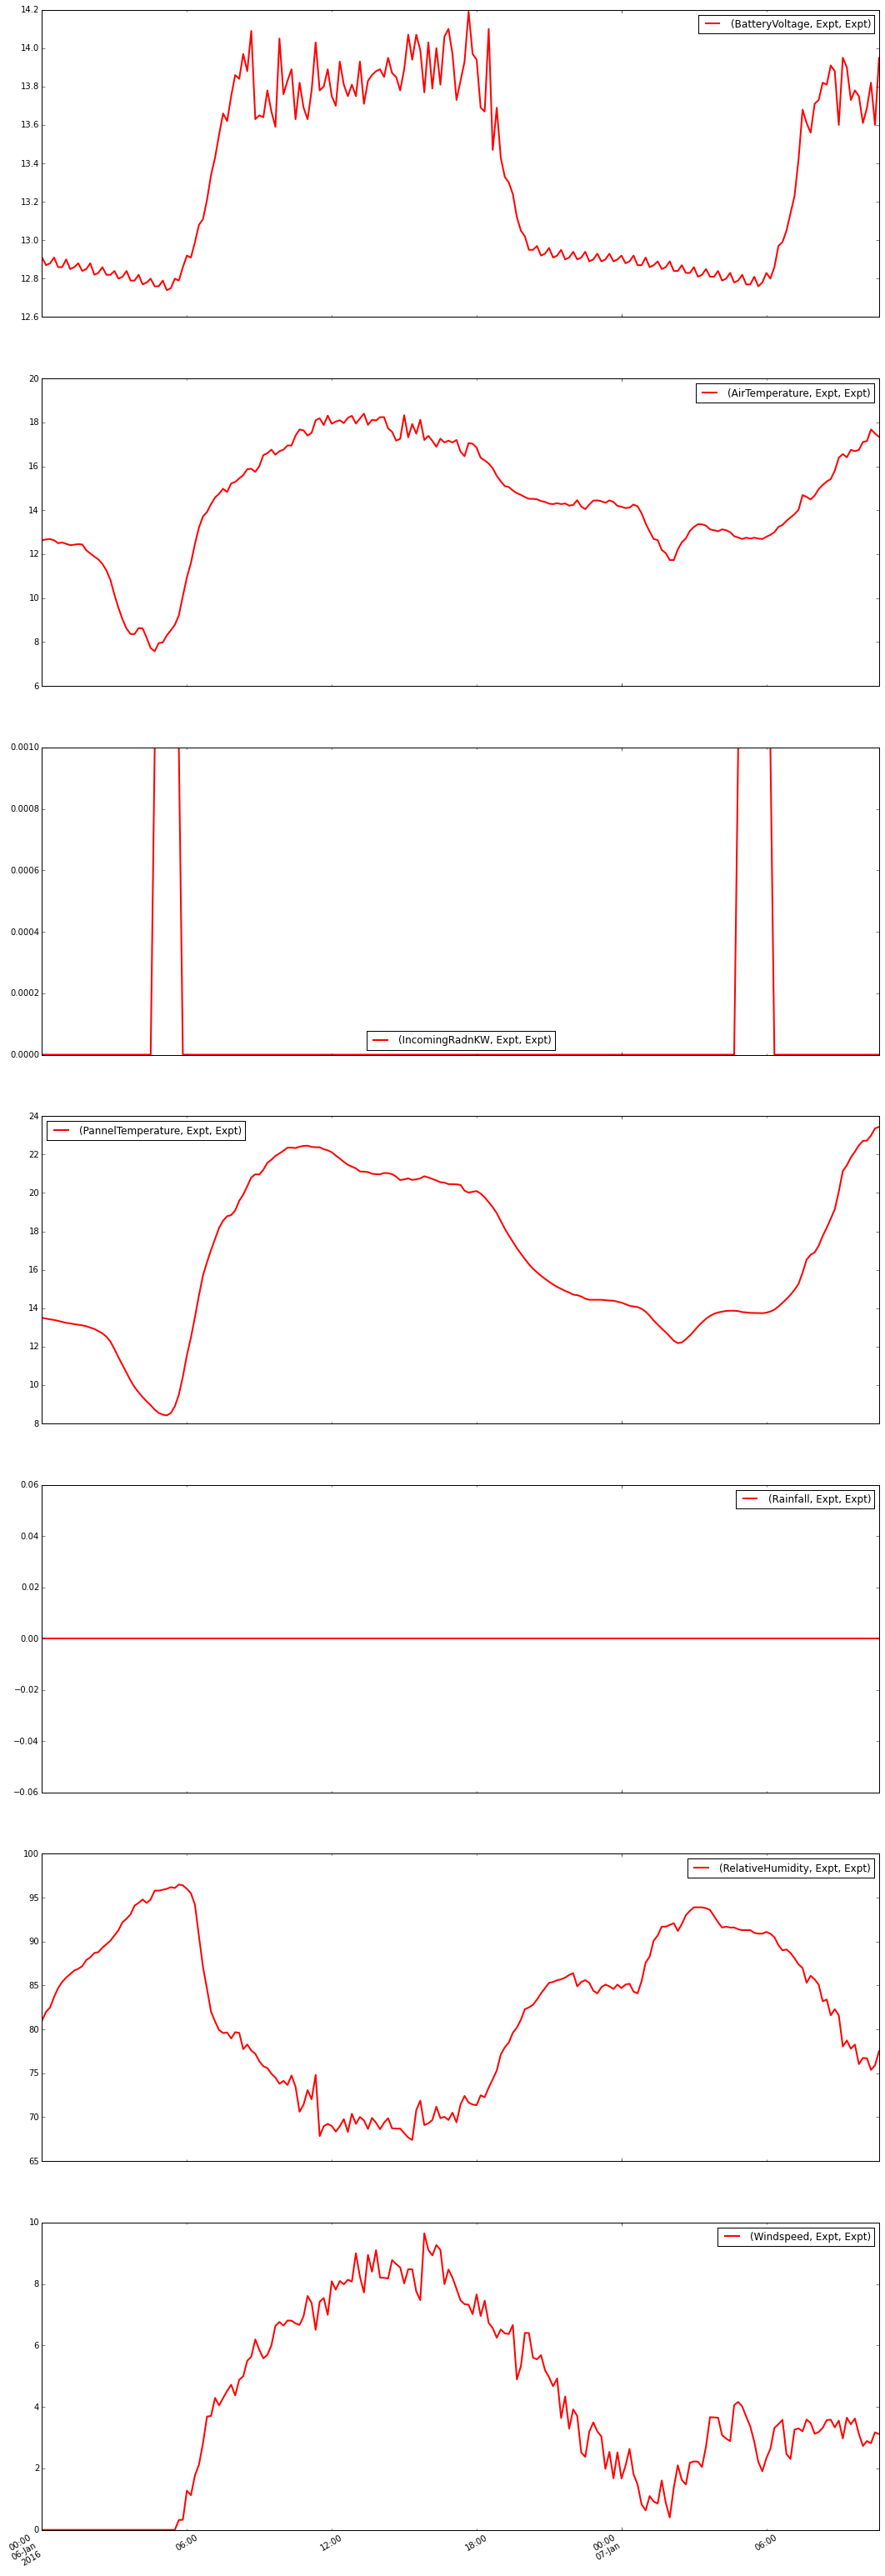

In [3]:
DataMeans.ix[StartDateString:,['BatteryVoltage','AirTemperature','IncomingRadnKW','Leafwetness','PannelTemperature','Rainfall','RelativeHumidity','Windspeed']].plot(subplots=True, figsize=(18, 60),
                    style='r-',
                    linewidth = 2)                                   

##Graph all sensors to check for anomolies

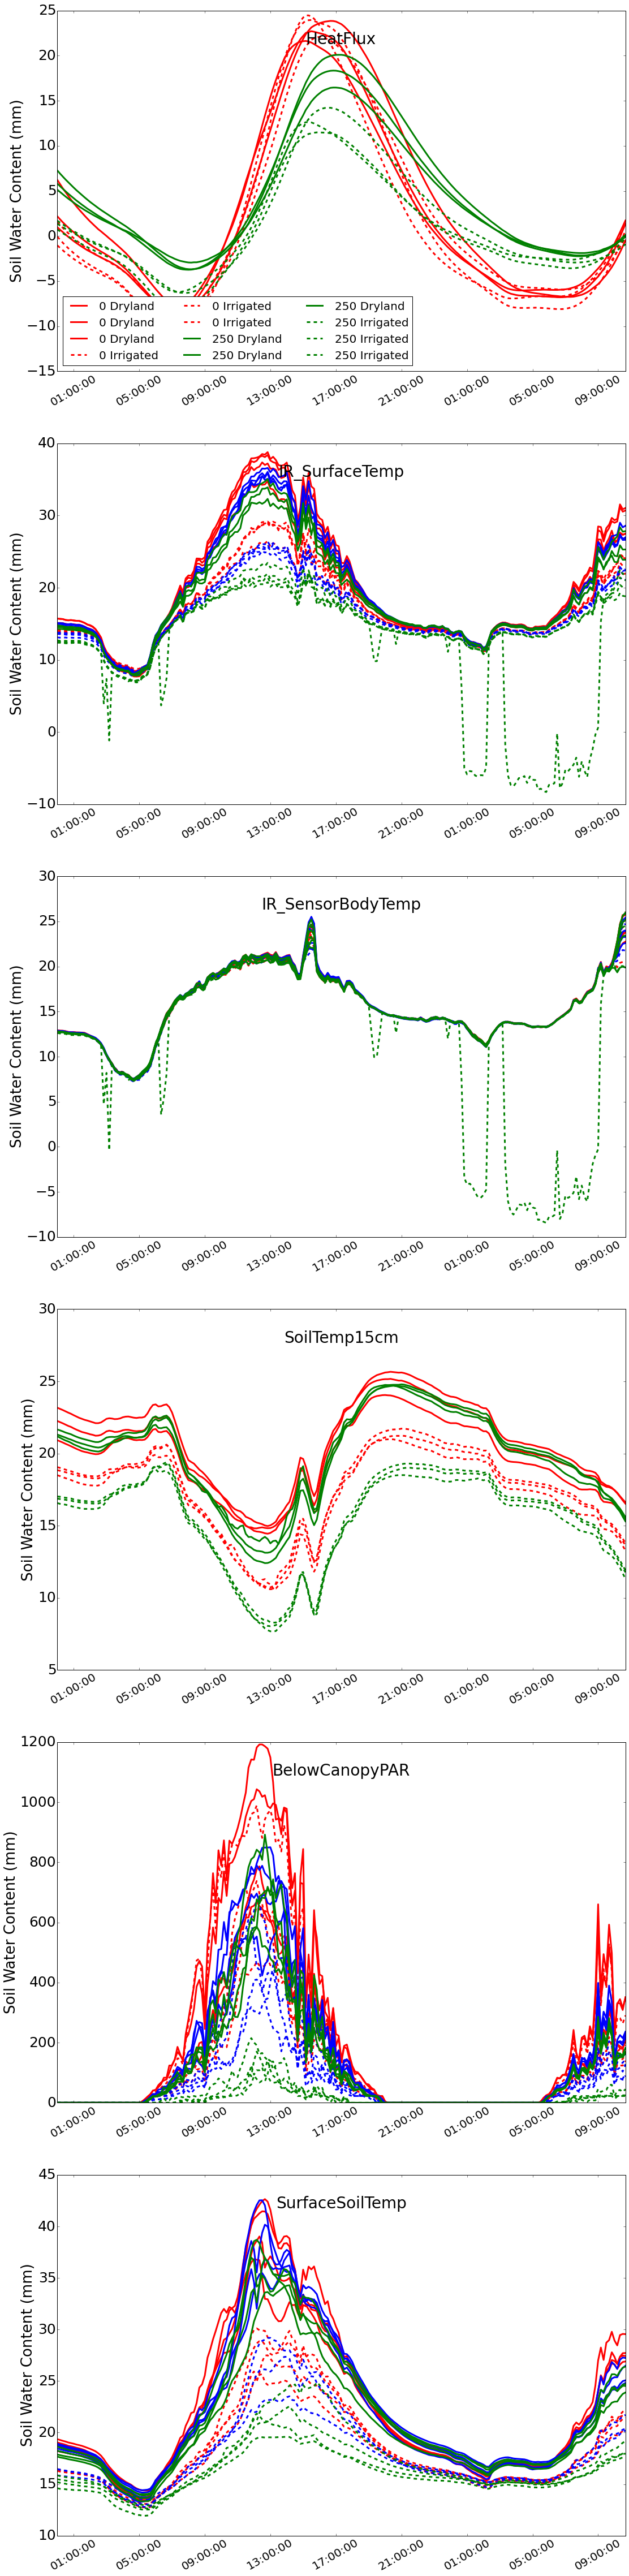

In [4]:
EnergyCheck = plt.figure(figsize = (18,80))
Variables = ['HeatFlux','IR_SurfaceTemp','IR_SensorBodyTemp','SoilTemp15cm','BelowCanopyPAR','SurfaceSoilTemp']
Colors = ['r','b','g']
NRates = ['0','50','250']
IRates = ['Dryland','Irrigated']
Lines = ['-','--']
Position = 1
for Variable in Variables:
    EnergyCheck.add_subplot(6,1,Position)
    ColorPosition = 0
    for NRate in NRates:
        LinePosition = 0
        for IRate in IRates:
            try:
                plt.plot(Data.ix[StartDateString:,(Variable,NRate,IRate)].index,
                    Data.ix[StartDateString:,(Variable,NRate,IRate)],
                    color = Colors[ColorPosition], 
                    linestyle = Lines[LinePosition],
                    label = NRate + ' ' + IRate, 
                    linewidth = 3)
                LinePosition +=1
            except:
                LinePosition +=1
        ColorPosition +=1
    #plt.ylim(0,.45)
    plt.ylabel('Soil Water Content (mm)', fontsize=26);
    plt.yticks(size=25)
    plt.title(Variable, fontsize=28, position = (0.5,.9))
    plt.xticks(size = 20, rotation= 30)
    if Position == 1:
        plt.legend(fontsize=20, loc=3, ncol = 3)
    Position += 1

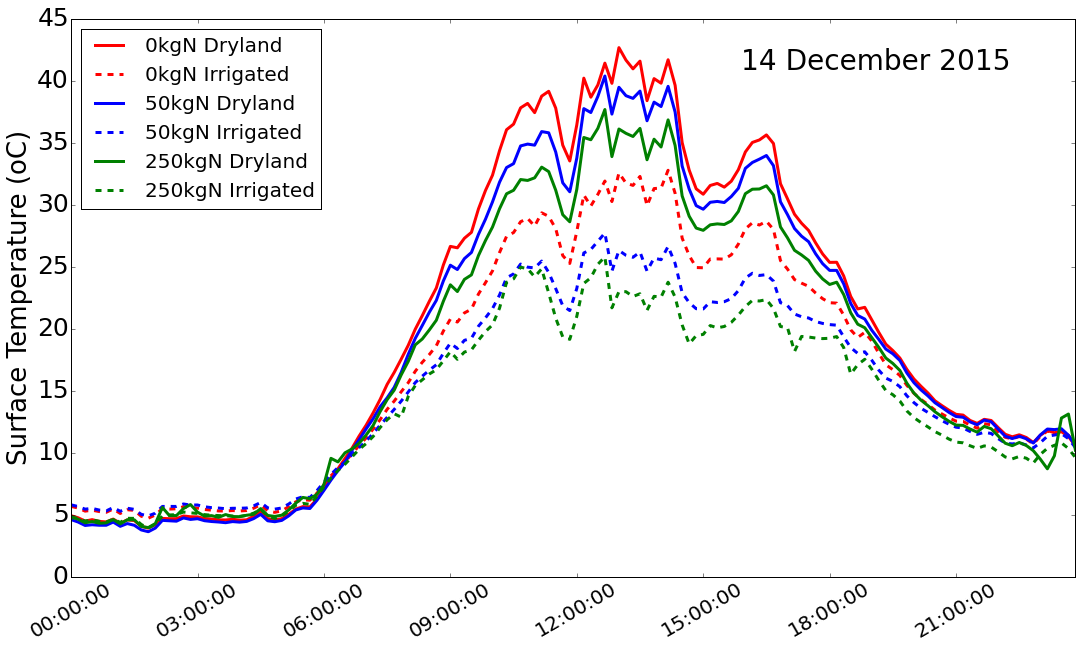

In [5]:
EnergyCheck = plt.figure(figsize = (18,10))
Variables = ['IR_SurfaceTemp']
Colors = ['r','b','g']
NRates = ['0','50','250']
IRates = ['Dryland','Irrigated']
Lines = ['-','--']
Position = 1
for Variable in Variables:
    ColorPosition = 0
    for NRate in NRates:
        LinePosition = 0
        for IRate in IRates:
            try:
                plt.plot(DataMeans.ix['2015-12-14',(Variable,IRate,NRate)].index,
                    DataMeans.ix['2015-12-14',(Variable,IRate,NRate)],
                    color = Colors[ColorPosition], 
                    linestyle = Lines[LinePosition],
                    label = NRate + 'kgN ' + IRate, 
                    linewidth = 3)
                LinePosition +=1
            except:
                LinePosition +=1
        ColorPosition +=1
    #plt.ylim(0,.45)
    plt.ylabel('Surface Temperature (oC)', fontsize=26);
    plt.yticks(size=25)
    plt.title('14 December 2015', fontsize=28, position = (0.8,.9))
    plt.xticks(size = 20, rotation= 30)
    #Position == 1:
    plt.legend(fontsize=20, loc=2, ncol = 1)
    Position += 1

##Graph treatment means

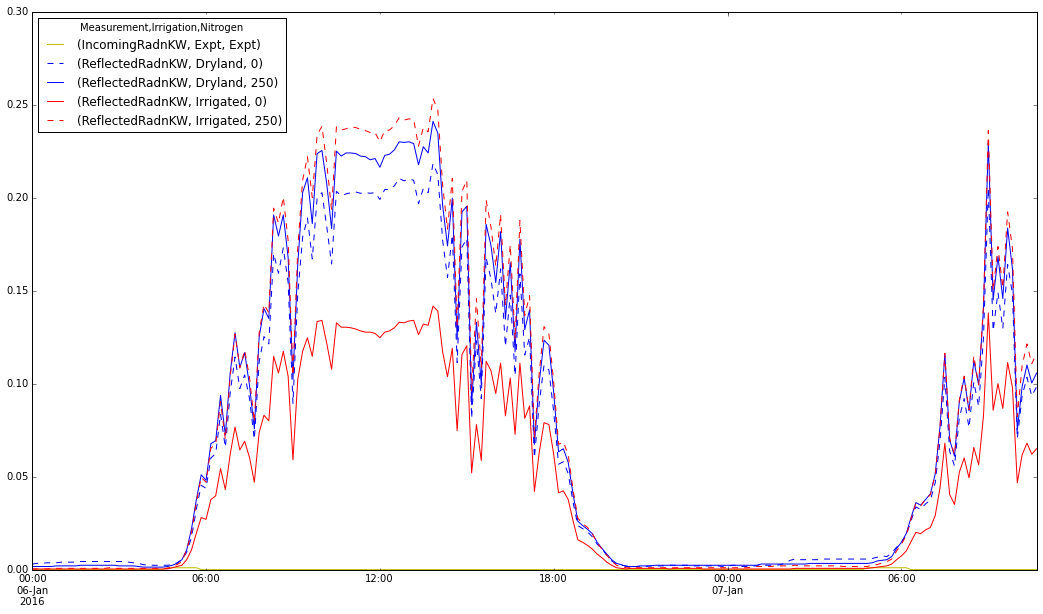

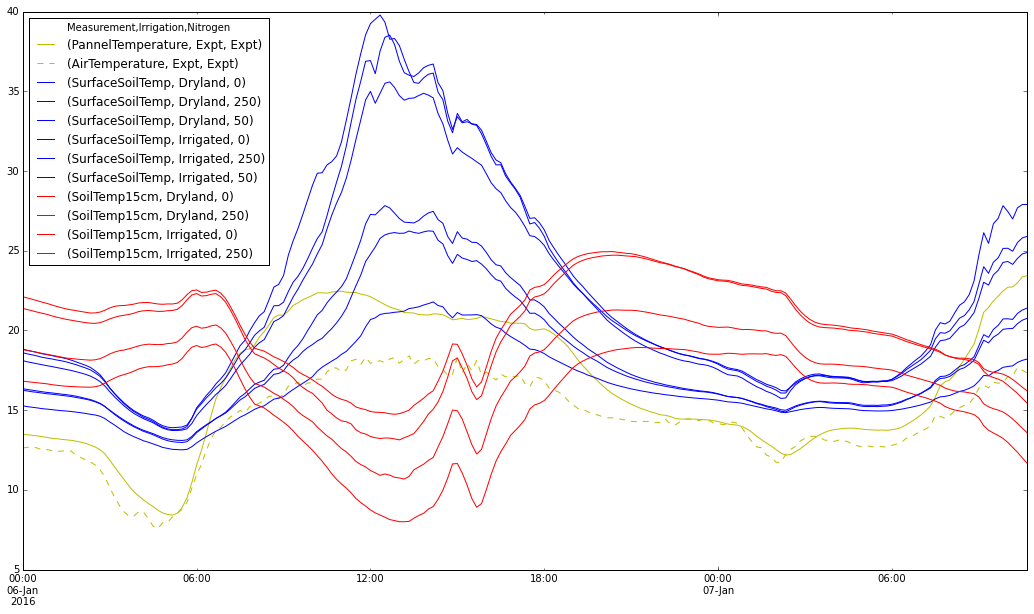

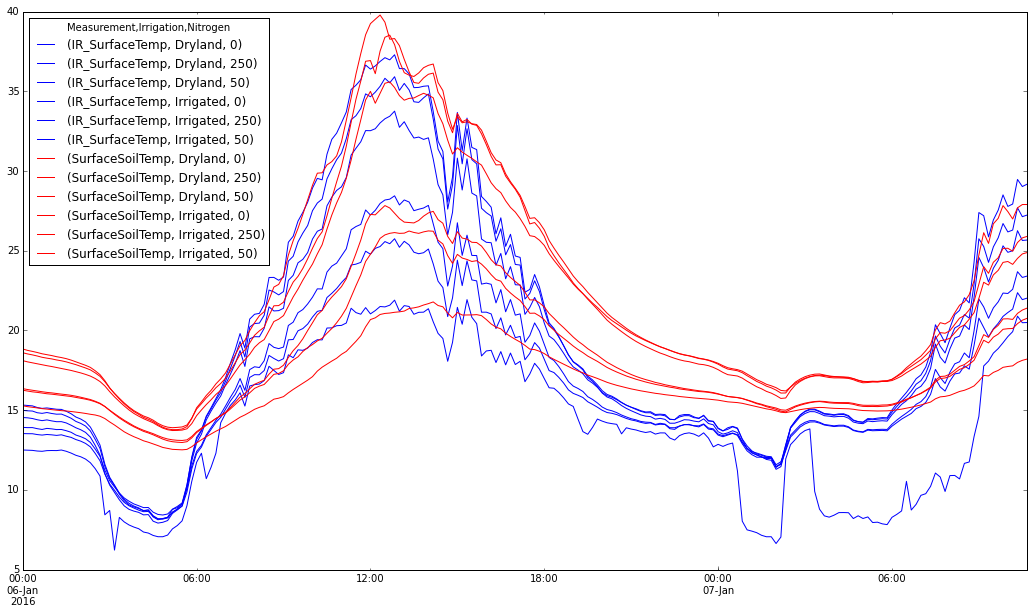

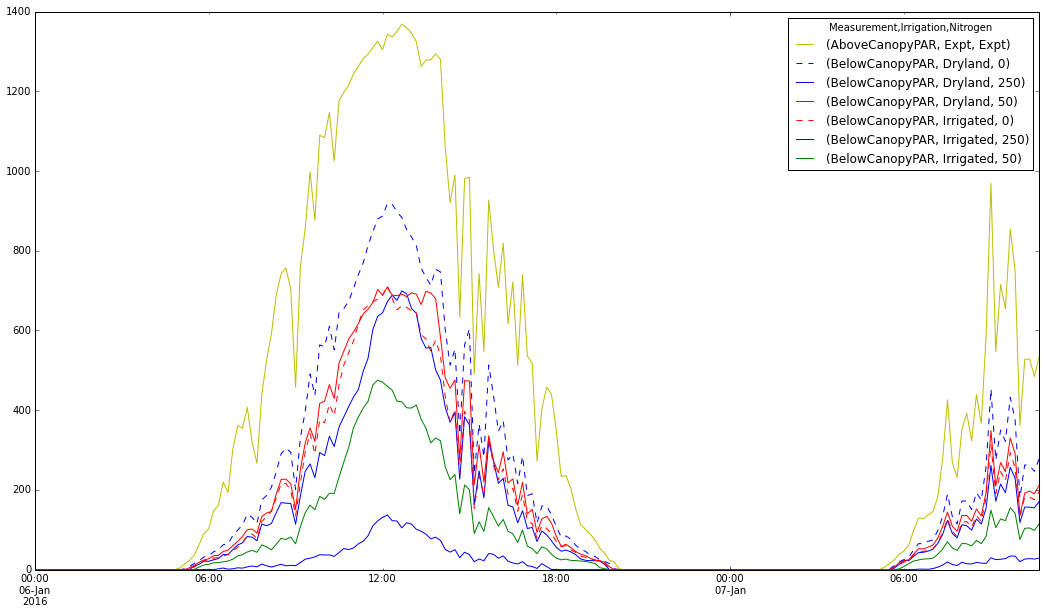

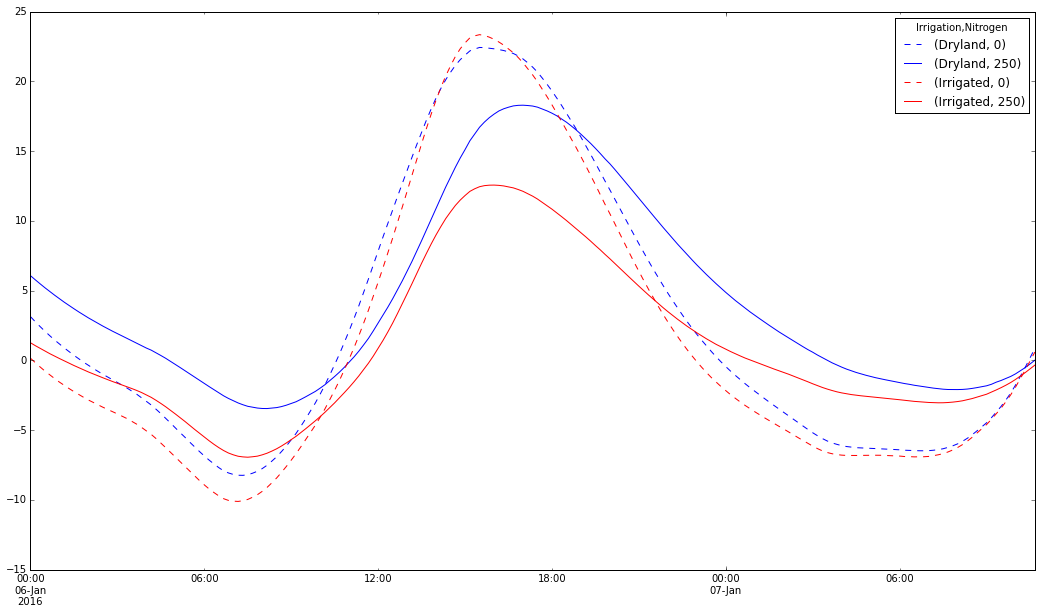

In [6]:
DataMeans = Data.groupby(level=['Measurement','Irrigation', 'Nitrogen'],axis=1).mean()
DataMeans = DataMeans.dropna(axis=1, how='all')
DataMeans.ix[StartDateString:,['IncomingRadnKW','ReflectedRadnKW']].plot(figsize=(18,10),style = ['y-','b--','b-','r-','r--'])
DataMeans.ix[StartDateString:,['PannelTemperature','AirTemperature','SurfaceSoilTemp','SoilTemp15cm']].plot(figsize=(18,10),style = ['y-','y--','b-','b-','b-','b-','b-','b-','r-','r-','r-','r-'])
DataMeans.ix[StartDateString:,['IR_SurfaceTemp','SurfaceSoilTemp']].plot(figsize=(18,10),style = ['b-','b-','b-','b-','b-','b-','r-','r-','r-','r-','r-','r-'])
DataMeans.ix[StartDateString:,['AboveCanopyPAR','BelowCanopyPAR']].plot(figsize=(18,10), style = ['y-','b--','b-','r-','r--'])
DataMeans.ix[StartDateString:,'HeatFlux'].plot(figsize=(18,10),style = ['b--','b-','r--','r-'])

##Calculate and graph radiation interception and reflection

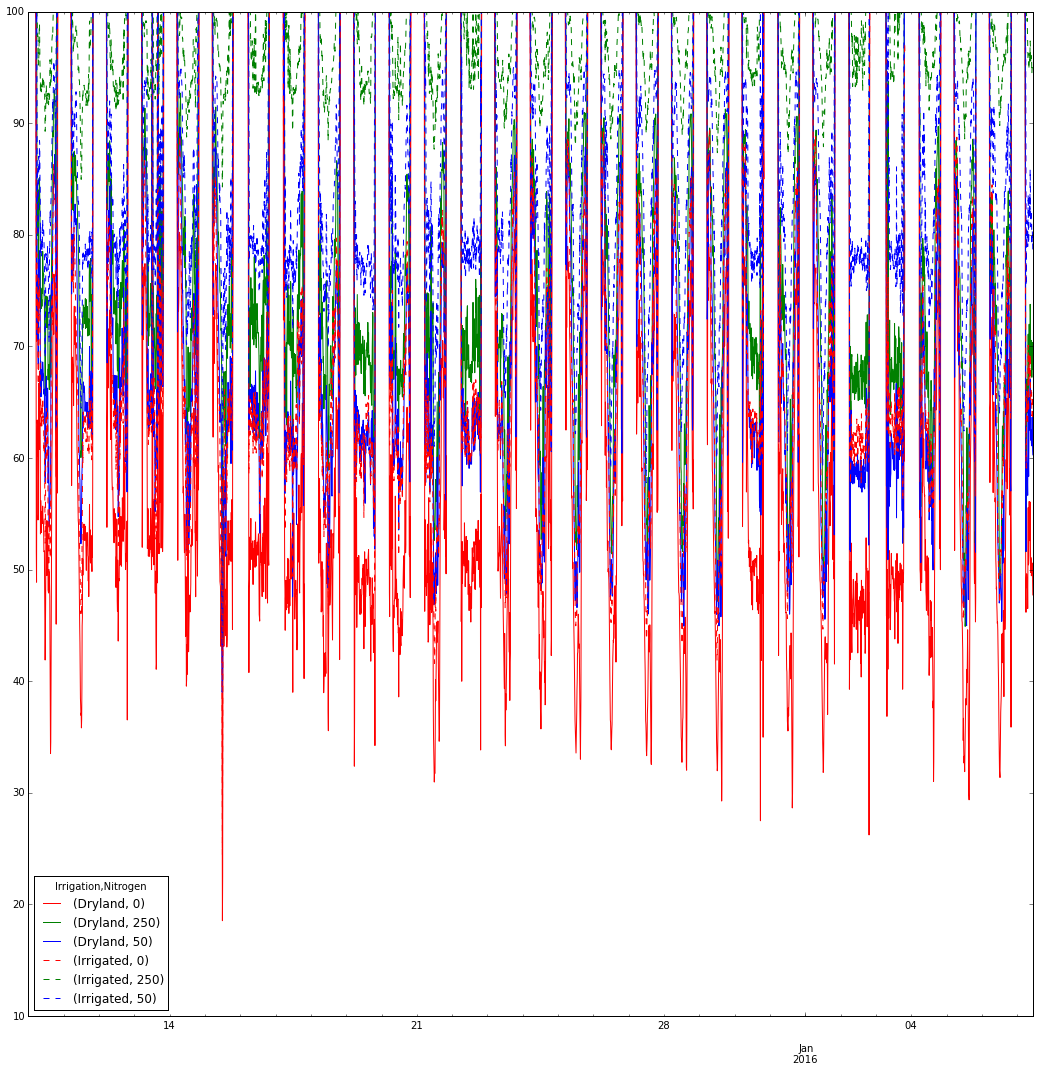

In [7]:
PARint = DataMeans.ix['2015-12-10':,'BelowCanopyPAR']
FractPARint = 100 - PARint.divide(DataMeans.ix['2015-12-10':,0], axis = 0)*100
FractPARint.plot(figsize=(18,18),
                 #ylim=(0,1),
                 style = ['r-','g-','b-','r--','g--','b--'])

#RadReflect = DataMeans.ix[:,'ReflectedRadnMJ']
#RadReflect = RadReflect.divide(DataMeans.ix[:,30], axis = 0)
#RadReflect.plot(figsize=(18,10),
##                 ylim=(0,1),
 #                style = ['b--','b-','r-','r--'])

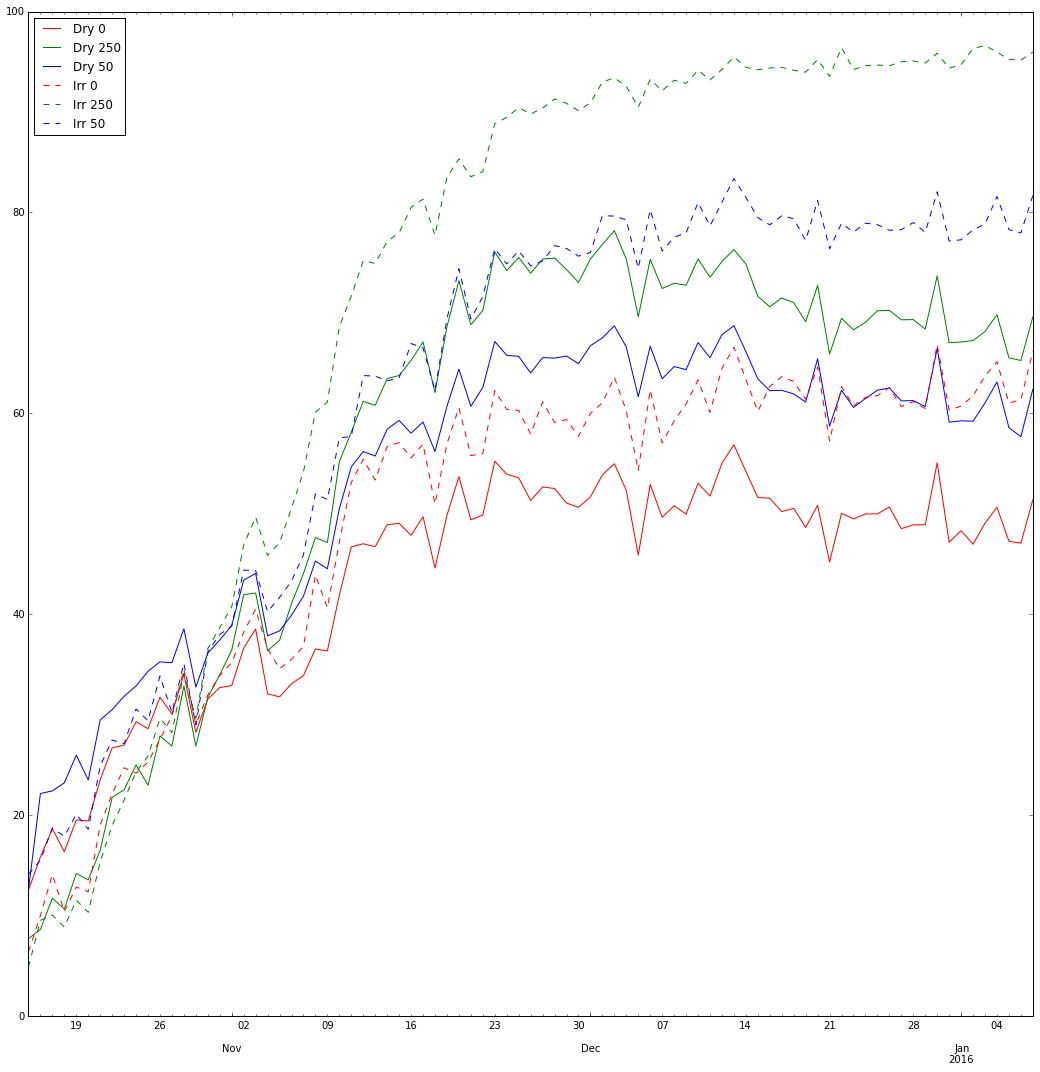

In [8]:
DailySums = DataMeans.resample('D', how='sum')
DailyFractPARint = pd.DataFrame(index = DailySums.index,
                                columns = ['Dry 0', 'Dry 250', 'Dry 50', 'Irr 0', 'Irr 250', 'Irr 50'],
                                data = 100 - DailySums.ix[:,'BelowCanopyPAR'].values / (DailySums.ix[:,'AboveCanopyPAR'].values) * 100)
DailyFractPARint.plot(figsize=(18,18),
                 #ylim=(0,1),
                 style = ['r-','g-','b-','r--','g--','b--'])

In [9]:
DailySums = DailySums.dropna(how= 'all')
DailyFractRadReflect = DailySums.ix[:,'ReflectedRadnMJ'] / DailySums.ix[:,59]
DailyFractRadReflect.plot(figsize=(18,10), style = ['b-','r-','r-','r--','r--','b-','r--','b--','r-','b-','b--','b--'] , ylim=(0,1))

IndexError: index 59 is out of bounds for axis 0 with size 58

In [ ]:
RadIndDataOut = DailyFractPARint.transpose()
RadIndDataOut.to_excel('.\DataFrames\DailyRadnDataRSBarley.xls')

In [ ]:
Data.to_pickle('.\DataFrames\RadnAndTempData.pkl')

In [ ]:
Data.columns